In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('titanic.csv')
data.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [3]:
data.isna().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [5]:
data['Cabin'].unique(), data['Cabin'].nunique()

(array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
        'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
        'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
        'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
        'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
        'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
        'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
        'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
        'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
        'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
        'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
        'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
        'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
        'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
   

In [6]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
data["PassengerId"].nunique()

891

# Dropping the columns

In [11]:
columns_to_drop = ["PassengerId", "Name", "Cabin", "Ticket"]

data_modified = data.drop(columns_to_drop, axis=1)

data_modified.head()






,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [14]:
data['Age'].isna().sum() / data.shape[0]

0.19865319865319866

In [15]:
data_modified[data_modified["Age"].isna()]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
5,0,3,male,NaN,0,0,8.4583,Q
17,1,2,male,NaN,0,0,13.0000,S
19,1,3,female,NaN,0,0,7.2250,C
26,0,3,male,NaN,0,0,7.2250,C
28,1,3,female,NaN,0,0,7.8792,Q
...,...,...,...,...,...,...,...,...
859,0,3,male,NaN,0,0,7.2292,C
863,0,3,female,NaN,8,2,69.5500,S
868,0,3,male,NaN,0,0,9.5000,S
878,0,3,male,NaN,0,0,7.8958,S


In [18]:
d1 = data_modified['Age'].fillna(value = 20)
d1.iloc[17]

20.0

In [21]:
d1 = data_modified['Age'].fillna(value = data_modified['Age'].mean() )
d1.head(6)

0    22.000000
1    38.000000
2    26.000000
3    35.000000
4    35.000000
5    29.699118
Name: Age, dtype: float64

In [22]:
data_modified['Age'].mean()

29.69911764705882

In [24]:
d1 = data_modified['Age'].fillna(method = 'ffill')
d1.head(7)


0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
5    35.0
6    54.0
Name: Age, dtype: float64

In [26]:
d1 = data_modified['Age'].fillna(method = 'bfill')
d1.head(7)


0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
5    54.0
6    54.0
Name: Age, dtype: float64

In [29]:
data["Embarked"].fillna(value = data['Embarked'].mode()[0])

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object

# Data Visualisation

In [30]:
import matplotlib.pyplot as plt
import seaborn as sb

<Axes: xlabel='Age'>

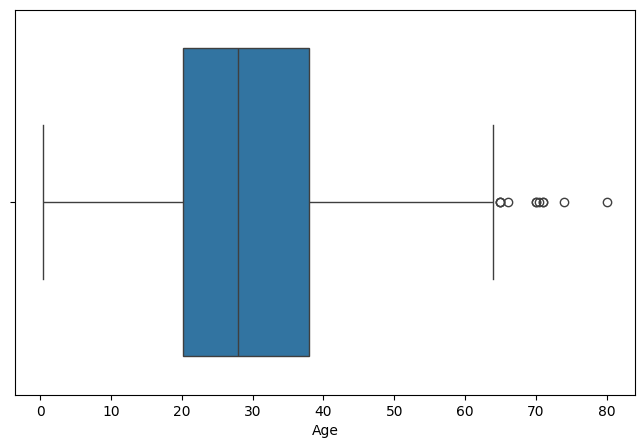

In [32]:
w = 8
h = 5
plt.figure(figsize = (w, h))

sb.boxplot(x = "Age", data = data_modified)

<Axes: xlabel='Age'>

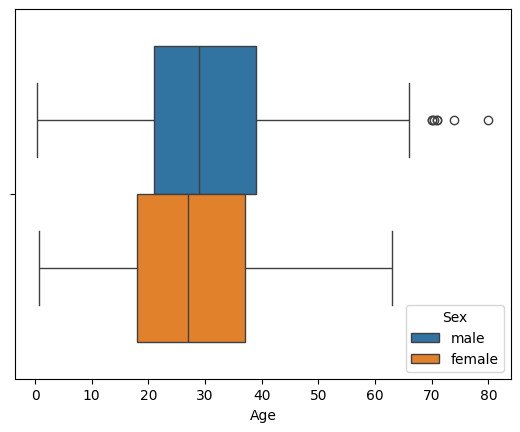

In [34]:
sb.boxplot(x = "Age", hue = "Sex", data = data_modified)

In [35]:
data_modified.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


<Axes: xlabel='Age'>

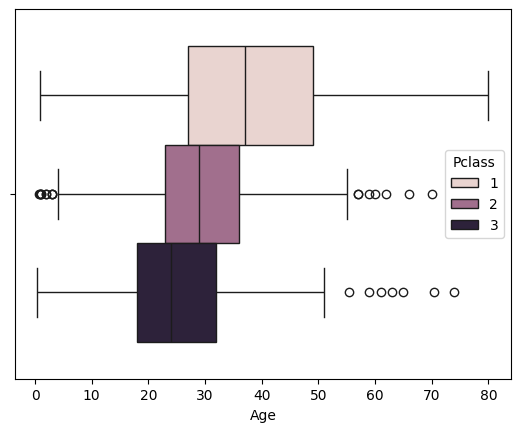

In [37]:
sb.boxplot(x="Age", hue ="Pclass", data = data_modified)

# kdeplot

In [38]:
data_modified["Age"].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

<Axes: xlabel='Age', ylabel='Density'>

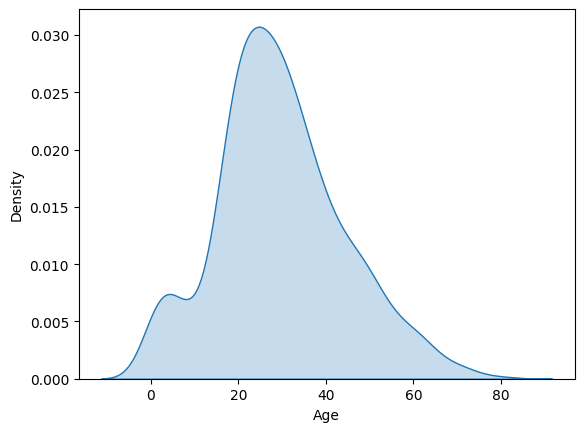

In [39]:
sb.kdeplot(data = data_modified, x = "Age", fill = True)

<Axes: xlabel='Age', ylabel='Count'>

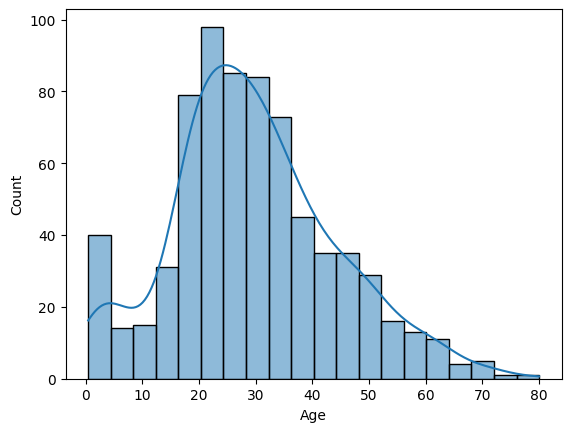

In [41]:
sb.histplot(data_modified, x = "Age", kde = True)

<Axes: xlabel='Survived', ylabel='Age'>

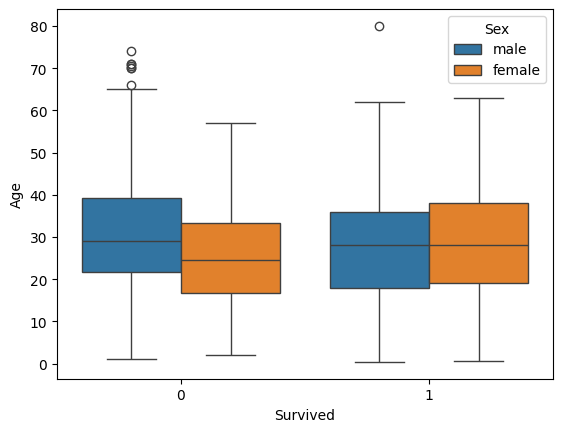

In [42]:
sb.boxplot(x = "Survived", y = "Age", hue = "Sex", data = data_modified )

# relplot

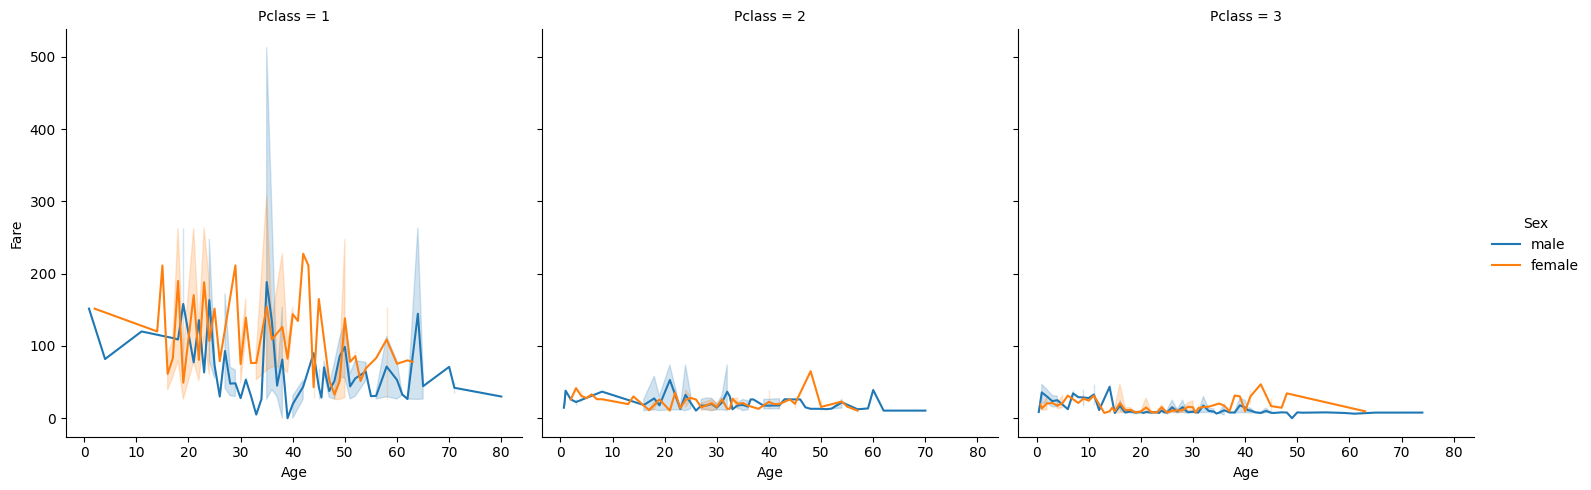

In [44]:
sb.relplot(x = "Age", y  = "Fare", col = "Pclass", hue = "Sex", data = data_modified, kind = "line" )

# correlation

In [45]:
data_modified.isna().any()

Survived    False
Pclass      False
Sex         False
Age          True
SibSp       False
Parch       False
Fare        False
Embarked     True
dtype: bool

In [50]:
# before applying correaltion plot you hav eto encode the categorical variable

data_corr  = data_modified.drop(["Sex", "Embarked"], axis=1)
data_corr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Age       714 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
dtypes: float64(2), int64(4)
memory usage: 41.9 KB


In [51]:
data_corr.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


<Axes: >

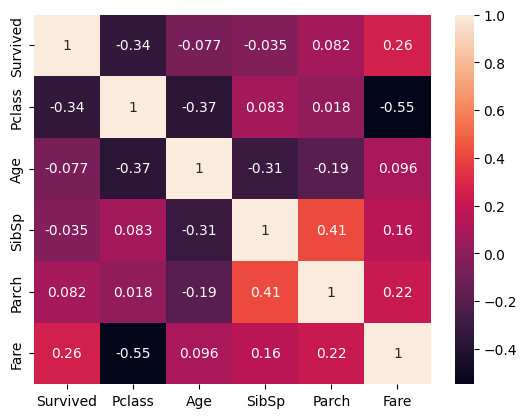

In [52]:
sb.heatmap(data_corr.corr(), annot = True)